In [1]:
python -version

NameError: name 'python' is not defined

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [249]:
# read data
train_df = pd.read_csv("A2_customer_churn_labeled.csv")
kaggle_df = pd.read_csv("A2_customer_churn_kaggle.csv")
test_df = pd.read_csv("A2_customer_churn_submission.csv")

In [250]:
def extract_age(row):
    age_pattern = r"\d+(?=-year-old)"
    age_match = re.search(pattern= age_pattern, string=row)
    if age_match:
        age = int(age_match.group(0))
        return age
    else:
        return None  
    
def extract_gender(row):
    gender_pattern = r"(?<=-year-old )([fm]?e?male)"
    gender_match = re.search(pattern= gender_pattern, string=row)
    if gender_match:
        gender = gender_match.group(0).lower()
        return gender
    else:
        return None
    
def extract_countary(row):
    country_pattern = r"(?<= from )\w+"
    country_match = re.search(pattern= country_pattern, string= row)
    if country_match:
        countary = country_match.group(0).lower()
        return countary
    else:
        return None

## Plotting Interactions

In [251]:
train_df["age"] = train_df["customer_profile"].apply(extract_age)
train_df["gender"] = train_df["customer_profile"].apply(extract_gender)
train_df["countary"] = train_df["customer_profile"].apply(extract_countary)

In [38]:
cat_cols = ["gender", "countary"]

In [39]:
train_encoded = pd.get_dummies(train_df, columns= cat_cols)
train_encoded = train_encoded.drop("ID", axis= 1)
train_encoded = train_encoded.drop("customer_profile", axis= 1)

In [40]:
train_encoded.columns

Index(['credit_score', 'tenure', 'balance', 'number_of_products',
       'has_credit_card', 'is_active_member', 'salary', 'Y', 'age',
       'gender_female', 'gender_male', 'countary_france', 'countary_germany',
       'countary_spain'],
      dtype='object')

In [51]:
train_encoded["balance/tenure"] = train_encoded["balance"] / train_encoded["tenure"]
train_encoded["balance/age"] = train_encoded["balance"] / train_encoded["age"]
train_encoded["salary/age"] = train_encoded["salary"] / train_encoded["age"]
train_encoded["balance/number_of_products"] = train_encoded["balance"] / train_encoded["number_of_products"]
train_encoded["credit_score/age"] = train_encoded["credit_score"] / train_encoded["age"]
train_encoded["balance*number_of_products"] = train_encoded["balance"] * train_encoded["number_of_products"]
train_encoded["salary/number_of_product"] = train_encoded["salary"] / train_encoded["number_of_products"]
train_encoded["age/number_of_product"] = train_encoded["age"] / train_encoded["number_of_products"]


<AxesSubplot:xlabel='Y', ylabel='balance/tenure'>

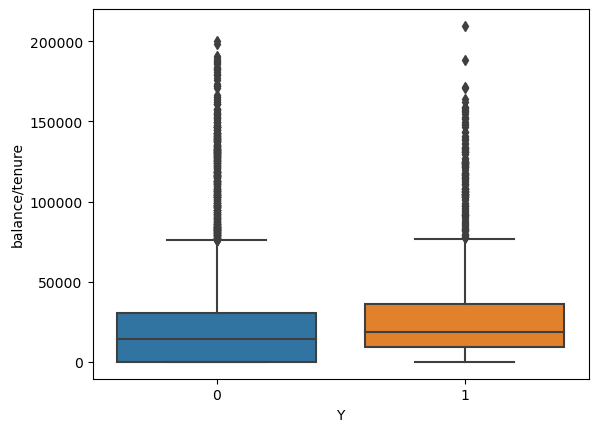

In [43]:
sns.boxplot(data= train_encoded, x= "Y", y= "balance/tenure")

<AxesSubplot:xlabel='Y', ylabel='balance/age'>

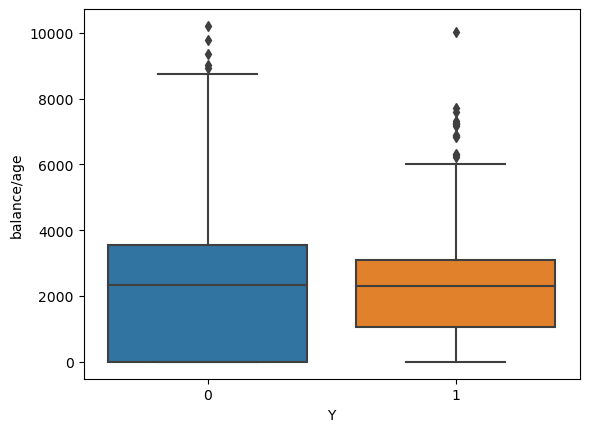

In [44]:
sns.boxplot(data= train_encoded, x= "Y", y= "balance/age")

<AxesSubplot:xlabel='Y', ylabel='salary/age'>

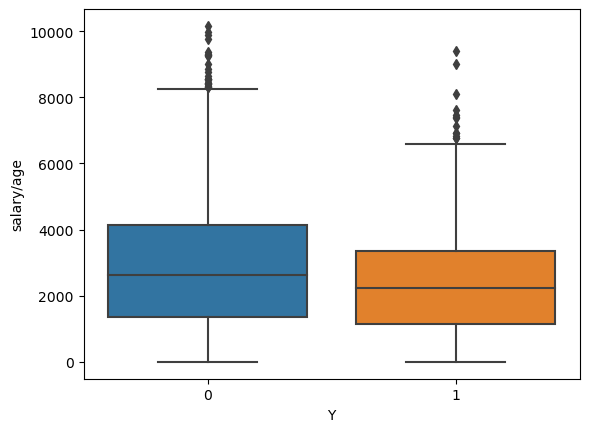

In [45]:
sns.boxplot(data= train_encoded, x= "Y", y= "salary/age")


<AxesSubplot:xlabel='Y', ylabel='balance/number_of_products'>

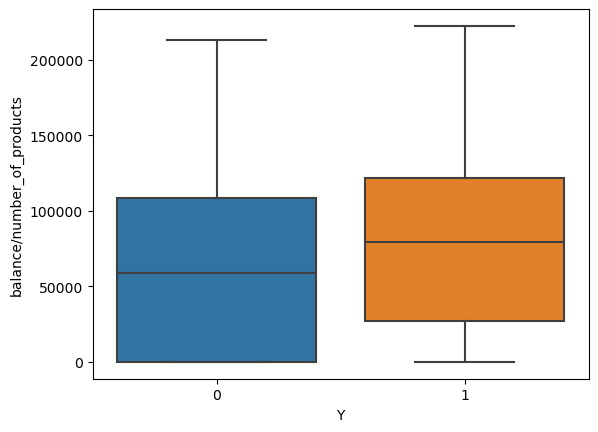

In [47]:
sns.boxplot(data= train_encoded, x= "Y", y= "balance/number_of_products")

<AxesSubplot:xlabel='Y', ylabel='credit_score/age'>

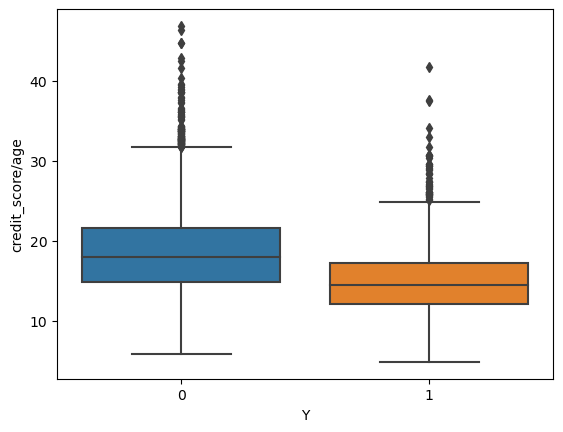

In [33]:
sns.boxplot(data= train_encoded, x= "Y", y= "credit_score/age")

<AxesSubplot:xlabel='Y', ylabel='balance*number_of_products'>

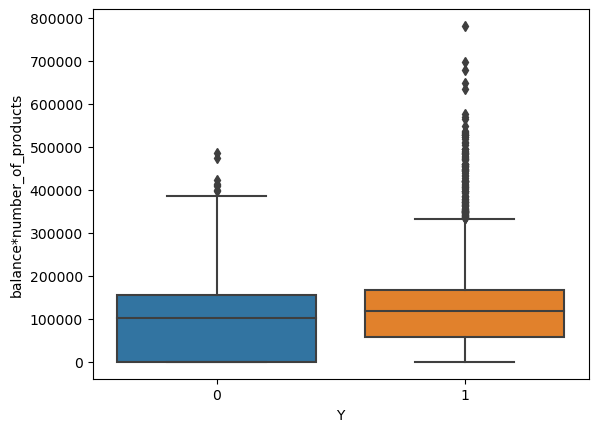

In [48]:
sns.boxplot(data= train_encoded, x= "Y", y= "balance*number_of_products")

<AxesSubplot:xlabel='Y', ylabel='salary/number_of_product'>

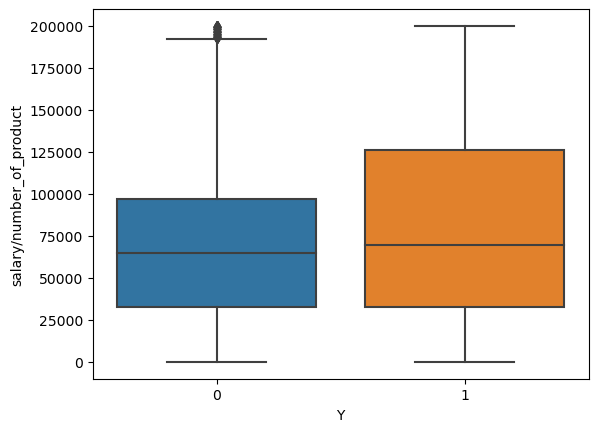

In [50]:
sns.boxplot(data= train_encoded, x= "Y", y= "salary/number_of_product")

<AxesSubplot:xlabel='Y', ylabel='age/number_of_product'>

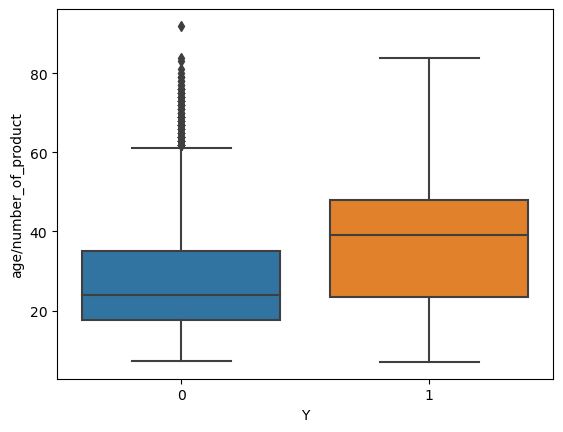

In [52]:
sns.boxplot(data= train_encoded, x= "Y", y= "age/number_of_product")

### RandomForest Base model

In [9]:
train_df["age"] = train_df["customer_profile"].apply(extract_age)
train_df["gender"] = train_df["customer_profile"].apply(extract_gender)
train_df["countary"] = train_df["customer_profile"].apply(extract_countary)

kaggle_df["age"] = kaggle_df["customer_profile"].apply(extract_age)
kaggle_df["gender"] = kaggle_df["customer_profile"].apply(extract_gender)
kaggle_df["countary"] = kaggle_df["customer_profile"].apply(extract_countary)

test_df["age"] = test_df["customer_profile"].apply(extract_age)
test_df["gender"] = test_df["customer_profile"].apply(extract_gender)
test_df["countary"] = test_df["customer_profile"].apply(extract_countary)

In [10]:
cat_cols = ["gender", "countary"]

In [11]:
train_encoded = pd.get_dummies(train_df, columns= cat_cols)
train_encoded = train_encoded.drop("ID", axis= 1)
train_encoded = train_encoded.drop("customer_profile", axis= 1)

kaggle_encoded = pd.get_dummies(kaggle_df, columns= cat_cols)
kaggle_encoded = kaggle_encoded.drop("ID", axis= 1)
kaggle_encoded = kaggle_encoded.drop("customer_profile", axis= 1)

test_encoded = pd.get_dummies(test_df, columns= cat_cols)
test_encoded = test_encoded.drop("ID", axis= 1)
test_encoded = test_encoded.drop("customer_profile", axis= 1)

In [12]:
feature_cols = [col for col in train_encoded.columns if col != "Y"]

In [18]:
rf_clf = RandomForestClassifier(random_state=1, n_jobs= 3)

In [19]:
rf_clf.fit(X= train_encoded[feature_cols], y= train_encoded["Y"])

RandomForestClassifier(n_jobs=3, random_state=1)

In [20]:
rf_pred = rf_clf.predict(kaggle_encoded[feature_cols])

In [21]:
df_pred = pd.concat([kaggle_df['ID'], pd.DataFrame(rf_pred,columns=['pred'])], axis = 1)
df_pred.to_csv('pred_values.csv',index=False)

Result of besed model, kaggle 0.58407

## Adding interaction credit_score/age

In [22]:
train_df["age"] = train_df["customer_profile"].apply(extract_age)
train_df["gender"] = train_df["customer_profile"].apply(extract_gender)
train_df["countary"] = train_df["customer_profile"].apply(extract_countary)

kaggle_df["age"] = kaggle_df["customer_profile"].apply(extract_age)
kaggle_df["gender"] = kaggle_df["customer_profile"].apply(extract_gender)
kaggle_df["countary"] = kaggle_df["customer_profile"].apply(extract_countary)

test_df["age"] = test_df["customer_profile"].apply(extract_age)
test_df["gender"] = test_df["customer_profile"].apply(extract_gender)
test_df["countary"] = test_df["customer_profile"].apply(extract_countary)

In [23]:
cat_cols = ["gender", "countary"]

In [24]:
train_encoded = pd.get_dummies(train_df, columns= cat_cols)
train_encoded = train_encoded.drop("ID", axis= 1)
train_encoded = train_encoded.drop("customer_profile", axis= 1)

kaggle_encoded = pd.get_dummies(kaggle_df, columns= cat_cols)
kaggle_encoded = kaggle_encoded.drop("ID", axis= 1)
kaggle_encoded = kaggle_encoded.drop("customer_profile", axis= 1)

test_encoded = pd.get_dummies(test_df, columns= cat_cols)
test_encoded = test_encoded.drop("ID", axis= 1)
test_encoded = test_encoded.drop("customer_profile", axis= 1)

In [25]:
# train_encoded["salary/age"] = train_encoded["salary"] / train_encoded["age"]
# train_encoded["balance*number_of_products"] = train_encoded["balance"] / train_encoded["number_of_products"]
train_encoded["credit_score/age"] = train_encoded["credit_score"] / train_encoded["age"]

# kaggle_encoded["salary/age"] = kaggle_encoded["salary"] / kaggle_encoded["age"]
# kaggle_encoded["balance*number_of_products"] = kaggle_encoded["balance"] / kaggle_encoded["number_of_products"]
kaggle_encoded["credit_score/age"] = kaggle_encoded["credit_score"] / kaggle_encoded["age"]

# test_encoded["salary/age"] = test_encoded["salary"] / test_encoded["age"]
# kaggle_encoded["balance*number_of_products"] = kaggle_encoded["balance"] / kaggle_encoded["number_of_products"]
test_encoded["credit_score/age"] = test_encoded["credit_score"] / test_encoded["age"]

<AxesSubplot:xlabel='Y', ylabel='credit_score/age'>

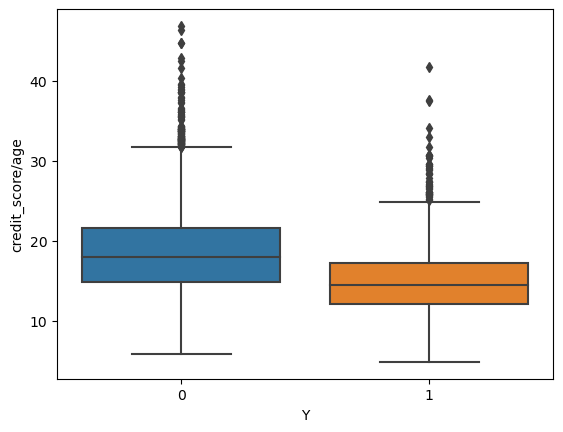

In [33]:
sns.boxplot(data= train_encoded, x= "Y", y= "credit_score/age")

In [26]:
feature_cols = [col for col in train_encoded.columns if col != "Y"]

In [27]:
rf_clf = RandomForestClassifier(random_state=1, n_jobs= 3)

In [28]:
rf_clf.fit(X= train_encoded[feature_cols], y= train_encoded["Y"])

RandomForestClassifier(n_jobs=3, random_state=1)

In [29]:
rf_pred = rf_clf.predict(kaggle_encoded[feature_cols])

In [30]:
df_pred = pd.concat([kaggle_df['ID'], pd.DataFrame(rf_pred,columns=['pred'])], axis = 1)
df_pred.to_csv('pred_values.csv',index=False)

Result of besed model, kaggle 0.59701

## Adding interaction age/number_of_products

In [55]:
train_df["age"] = train_df["customer_profile"].apply(extract_age)
train_df["gender"] = train_df["customer_profile"].apply(extract_gender)
train_df["countary"] = train_df["customer_profile"].apply(extract_countary)

kaggle_df["age"] = kaggle_df["customer_profile"].apply(extract_age)
kaggle_df["gender"] = kaggle_df["customer_profile"].apply(extract_gender)
kaggle_df["countary"] = kaggle_df["customer_profile"].apply(extract_countary)

test_df["age"] = test_df["customer_profile"].apply(extract_age)
test_df["gender"] = test_df["customer_profile"].apply(extract_gender)
test_df["countary"] = test_df["customer_profile"].apply(extract_countary)

In [56]:
cat_cols = ["gender", "countary"]

In [57]:
train_encoded = pd.get_dummies(train_df, columns= cat_cols)
train_encoded = train_encoded.drop("ID", axis= 1)
train_encoded = train_encoded.drop("customer_profile", axis= 1)

kaggle_encoded = pd.get_dummies(kaggle_df, columns= cat_cols)
kaggle_encoded = kaggle_encoded.drop("ID", axis= 1)
kaggle_encoded = kaggle_encoded.drop("customer_profile", axis= 1)

test_encoded = pd.get_dummies(test_df, columns= cat_cols)
test_encoded = test_encoded.drop("ID", axis= 1)
test_encoded = test_encoded.drop("customer_profile", axis= 1)

In [58]:
# train_encoded["salary/age"] = train_encoded["salary"] / train_encoded["age"]
# train_encoded["balance*number_of_products"] = train_encoded["balance"] / train_encoded["number_of_products"]
# train_encoded["credit_score/age"] = train_encoded["credit_score"] / train_encoded["age"]
train_encoded["age/number_of_product"] = train_encoded["age"] / train_encoded["number_of_products"]

# kaggle_encoded["salary/age"] = kaggle_encoded["salary"] / kaggle_encoded["age"]
# kaggle_encoded["balance*number_of_products"] = kaggle_encoded["balance"] / kaggle_encoded["number_of_products"]
# kaggle_encoded["credit_score/age"] = kaggle_encoded["credit_score"] / kaggle_encoded["age"]
kaggle_encoded["age/number_of_product"] = kaggle_encoded["age"] / kaggle_encoded["number_of_products"]

# test_encoded["salary/age"] = test_encoded["salary"] / test_encoded["age"]
# kaggle_encoded["balance*number_of_products"] = kaggle_encoded["balance"] / kaggle_encoded["number_of_products"]
# test_encoded["credit_score/age"] = test_encoded["credit_score"] / test_encoded["age"]
test_encoded["age/number_of_product"] = test_encoded["age"] / test_encoded["number_of_products"]

<AxesSubplot:xlabel='Y', ylabel='age/number_of_product'>

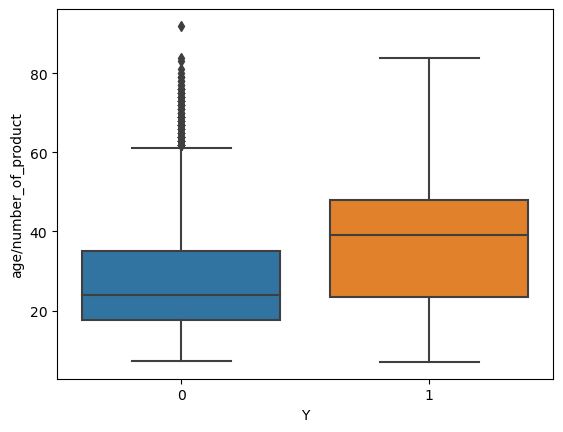

In [59]:
sns.boxplot(data= train_encoded, x= "Y", y= "age/number_of_product")

In [60]:
feature_cols = [col for col in train_encoded.columns if col != "Y"]

In [61]:
rf_clf = RandomForestClassifier(random_state=1, n_jobs= 3)

In [62]:
rf_clf.fit(X= train_encoded[feature_cols], y= train_encoded["Y"])

RandomForestClassifier(n_jobs=3, random_state=1)

In [63]:
rf_pred = rf_clf.predict(kaggle_encoded[feature_cols])

In [64]:
df_pred = pd.concat([kaggle_df['ID'], pd.DataFrame(rf_pred,columns=['pred'])], axis = 1)
df_pred.to_csv('pred_values.csv',index=False)

Result of besed model, kaggle 0.59701

## Add Both Interaction

In [65]:
train_df["age"] = train_df["customer_profile"].apply(extract_age)
train_df["gender"] = train_df["customer_profile"].apply(extract_gender)
train_df["countary"] = train_df["customer_profile"].apply(extract_countary)

kaggle_df["age"] = kaggle_df["customer_profile"].apply(extract_age)
kaggle_df["gender"] = kaggle_df["customer_profile"].apply(extract_gender)
kaggle_df["countary"] = kaggle_df["customer_profile"].apply(extract_countary)

test_df["age"] = test_df["customer_profile"].apply(extract_age)
test_df["gender"] = test_df["customer_profile"].apply(extract_gender)
test_df["countary"] = test_df["customer_profile"].apply(extract_countary)

In [66]:
cat_cols = ["gender", "countary"]

In [67]:
train_encoded = pd.get_dummies(train_df, columns= cat_cols)
train_encoded = train_encoded.drop("ID", axis= 1)
train_encoded = train_encoded.drop("customer_profile", axis= 1)

kaggle_encoded = pd.get_dummies(kaggle_df, columns= cat_cols)
kaggle_encoded = kaggle_encoded.drop("ID", axis= 1)
kaggle_encoded = kaggle_encoded.drop("customer_profile", axis= 1)

test_encoded = pd.get_dummies(test_df, columns= cat_cols)
test_encoded = test_encoded.drop("ID", axis= 1)
test_encoded = test_encoded.drop("customer_profile", axis= 1)

In [68]:
# train_encoded["salary/age"] = train_encoded["salary"] / train_encoded["age"]
# train_encoded["balance*number_of_products"] = train_encoded["balance"] / train_encoded["number_of_products"]
train_encoded["credit_score/age"] = train_encoded["credit_score"] / train_encoded["age"]
train_encoded["age/number_of_product"] = train_encoded["age"] / train_encoded["number_of_products"]


# kaggle_encoded["salary/age"] = kaggle_encoded["salary"] / kaggle_encoded["age"]
# kaggle_encoded["balance*number_of_products"] = kaggle_encoded["balance"] / kaggle_encoded["number_of_products"]
kaggle_encoded["credit_score/age"] = kaggle_encoded["credit_score"] / kaggle_encoded["age"]
kaggle_encoded["age/number_of_product"] = kaggle_encoded["age"] / kaggle_encoded["number_of_products"]


# test_encoded["salary/age"] = test_encoded["salary"] / test_encoded["age"]
# kaggle_encoded["balance*number_of_products"] = kaggle_encoded["balance"] / kaggle_encoded["number_of_products"]
test_encoded["credit_score/age"] = test_encoded["credit_score"] / test_encoded["age"]
test_encoded["age/number_of_product"] = test_encoded["age"] / test_encoded["number_of_products"]

In [70]:
feature_cols = [col for col in train_encoded.columns if col != "Y"]

In [71]:
rf_clf = RandomForestClassifier(random_state=1, n_jobs= 3)

In [72]:
rf_clf.fit(X= train_encoded[feature_cols], y= train_encoded["Y"])

RandomForestClassifier(n_jobs=3, random_state=1)

In [73]:
rf_pred = rf_clf.predict(kaggle_encoded[feature_cols])

In [74]:
df_pred = pd.concat([kaggle_df['ID'], pd.DataFrame(rf_pred,columns=['pred'])], axis = 1)
df_pred.to_csv('pred_values.csv',index=False)

Result of besed model, kaggle 0.60518

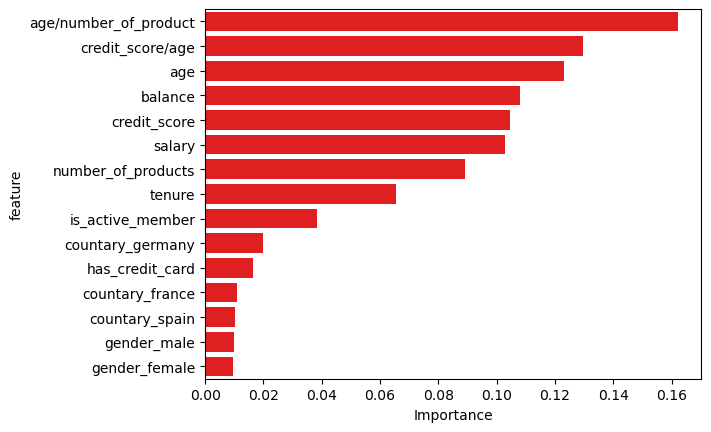

In [79]:
importance_df = pd.DataFrame(zip(feature_cols, rf_clf.feature_importances_), columns=["feature", "Importance"])
importance_df = importance_df.sort_values("Importance", ascending= False)

sns.barplot(data=importance_df, y= "feature", x= "Importance", color= "red")
plt.show()

<AxesSubplot:xlabel='Y', ylabel='number_of_products'>

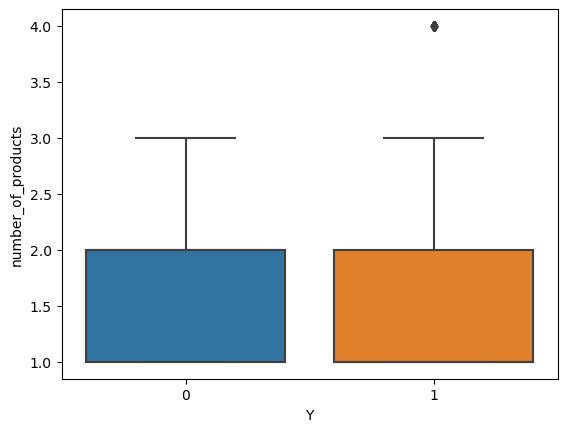

In [80]:
sns.boxplot(data= train_encoded, x= "Y", y= "number_of_products")

## Drop less importances

In [127]:
train_df["age"] = train_df["customer_profile"].apply(extract_age)
train_df["gender"] = train_df["customer_profile"].apply(extract_gender)
train_df["countary"] = train_df["customer_profile"].apply(extract_countary)

kaggle_df["age"] = kaggle_df["customer_profile"].apply(extract_age)
kaggle_df["gender"] = kaggle_df["customer_profile"].apply(extract_gender)
kaggle_df["countary"] = kaggle_df["customer_profile"].apply(extract_countary)

test_df["age"] = test_df["customer_profile"].apply(extract_age)
test_df["gender"] = test_df["customer_profile"].apply(extract_gender)
test_df["countary"] = test_df["customer_profile"].apply(extract_countary)

In [128]:
cat_cols = ["gender", "countary"]

In [129]:
train_encoded = pd.get_dummies(train_df, columns= cat_cols)
train_encoded = train_encoded.drop("ID", axis= 1)
train_encoded = train_encoded.drop("customer_profile", axis= 1)

kaggle_encoded = pd.get_dummies(kaggle_df, columns= cat_cols)
kaggle_encoded = kaggle_encoded.drop("ID", axis= 1)
kaggle_encoded = kaggle_encoded.drop("customer_profile", axis= 1)

test_encoded = pd.get_dummies(test_df, columns= cat_cols)
test_encoded = test_encoded.drop("ID", axis= 1)
test_encoded = test_encoded.drop("customer_profile", axis= 1)

In [130]:
train_encoded["credit_score/age"] = train_encoded["credit_score"] / train_encoded["age"]
train_encoded["age/number_of_product"] = train_encoded["age"] / train_encoded["number_of_products"]


kaggle_encoded["credit_score/age"] = kaggle_encoded["credit_score"] / kaggle_encoded["age"]
kaggle_encoded["age/number_of_product"] = kaggle_encoded["age"] / kaggle_encoded["number_of_products"]

test_encoded["credit_score/age"] = test_encoded["credit_score"] / test_encoded["age"]
test_encoded["age/number_of_product"] = test_encoded["age"] / test_encoded["number_of_products"]

In [139]:
feature_cols = list(importance_df["feature"])[:-6]

In [140]:
feature_cols

['age/number_of_product',
 'credit_score/age',
 'age',
 'balance',
 'credit_score',
 'salary',
 'number_of_products',
 'tenure',
 'is_active_member']

In [141]:
len(feature_cols)

9

In [142]:
# feature_cols = [col for col in train_encoded.columns if col not in ["Y", "number_of_products"]]

In [143]:
rf_clf = RandomForestClassifier(random_state=1, n_jobs= 3)

In [144]:
rf_clf.fit(X= train_encoded[feature_cols], y= train_encoded["Y"])

RandomForestClassifier(n_jobs=3, random_state=1)

In [145]:
rf_pred = rf_clf.predict(kaggle_encoded[feature_cols])

In [146]:
df_pred = pd.concat([kaggle_df['ID'], pd.DataFrame(rf_pred,columns=['pred'])], axis = 1)
df_pred.to_csv('pred_values.csv',index=False)

Result
* top 13 0.59475
* top 12 0.57478
* top 11 0.58857
* top 09 0.5481

## Tuning parameters

In [233]:
train_df["age"] = train_df["customer_profile"].apply(extract_age)
train_df["gender"] = train_df["customer_profile"].apply(extract_gender)
train_df["countary"] = train_df["customer_profile"].apply(extract_countary)

kaggle_df["age"] = kaggle_df["customer_profile"].apply(extract_age)
kaggle_df["gender"] = kaggle_df["customer_profile"].apply(extract_gender)
kaggle_df["countary"] = kaggle_df["customer_profile"].apply(extract_countary)

test_df["age"] = test_df["customer_profile"].apply(extract_age)
test_df["gender"] = test_df["customer_profile"].apply(extract_gender)
test_df["countary"] = test_df["customer_profile"].apply(extract_countary)

In [234]:
cat_cols = ["gender", "countary"]

In [235]:
train_encoded = pd.get_dummies(train_df, columns= cat_cols)
train_encoded = train_encoded.drop("ID", axis= 1)
train_encoded = train_encoded.drop("customer_profile", axis= 1)

kaggle_encoded = pd.get_dummies(kaggle_df, columns= cat_cols)
kaggle_encoded = kaggle_encoded.drop("ID", axis= 1)
kaggle_encoded = kaggle_encoded.drop("customer_profile", axis= 1)

test_encoded = pd.get_dummies(test_df, columns= cat_cols)
test_encoded = test_encoded.drop("ID", axis= 1)
test_encoded = test_encoded.drop("customer_profile", axis= 1)

In [236]:
# train_encoded["salary/age"] = train_encoded["salary"] / train_encoded["age"]
# train_encoded["balance*number_of_products"] = train_encoded["balance"] / train_encoded["number_of_products"]
train_encoded["credit_score/age"] = train_encoded["credit_score"] / train_encoded["age"]
train_encoded["age/number_of_product"] = train_encoded["age"] / train_encoded["number_of_products"]


# kaggle_encoded["salary/age"] = kaggle_encoded["salary"] / kaggle_encoded["age"]
# kaggle_encoded["balance*number_of_products"] = kaggle_encoded["balance"] / kaggle_encoded["number_of_products"]
kaggle_encoded["credit_score/age"] = kaggle_encoded["credit_score"] / kaggle_encoded["age"]
kaggle_encoded["age/number_of_product"] = kaggle_encoded["age"] / kaggle_encoded["number_of_products"]


# test_encoded["salary/age"] = test_encoded["salary"] / test_encoded["age"]
# kaggle_encoded["balance*number_of_products"] = kaggle_encoded["balance"] / kaggle_encoded["number_of_products"]
test_encoded["credit_score/age"] = test_encoded["credit_score"] / test_encoded["age"]
test_encoded["age/number_of_product"] = test_encoded["age"] / test_encoded["number_of_products"]

In [237]:
feature_cols = [col for col in train_encoded.columns if col != "Y"]

In [167]:
# ROUND 1
param_grid = [
    {"criterion": ["gini", "entropy", "log_loss"], # regularisation
     "n_estimators": [100, 300, 500],
     "max_depth": [None, 10, 20, 30],
#      "min_samples_split": [2, 5, 10],
#      "min_samples_leaf": [1, 2, 4],
     "max_features": [None, "sqrt", "log2"]
    }
]

optimal_params = GridSearchCV(
    RandomForestClassifier(n_jobs= 10),
    param_grid,
    cv= 10,
    scoring= "accuracy",
    verbose=0
)

optimal_params.fit(train_encoded[feature_cols], train_encoded["Y"])

GridSearchCV(cv=10, estimator=RandomForestClassifier(n_jobs=10),
             param_grid=[{'criterion': ['gini', 'entropy', 'log_loss'],
                          'max_depth': [None, 10, 20, 30],
                          'max_features': [None, 'sqrt', 'log2'],
                          'n_estimators': [100, 300, 500]}],
             scoring='accuracy')

In [168]:
optimal_params.best_params_

{'criterion': 'log_loss',
 'max_depth': 10,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [169]:
# retain model
rf_clf = RandomForestClassifier(random_state=1, n_jobs= 3,
                               criterion= "log_loss",
                               max_depth= 10,
                               max_features= "sqrt",
                               n_estimators= 100)

In [170]:
rf_clf.fit(X= train_encoded[feature_cols], y= train_encoded["Y"])

RandomForestClassifier(criterion='log_loss', max_depth=10, n_jobs=3,
                       random_state=1)

In [171]:
rf_pred = rf_clf.predict(kaggle_encoded[feature_cols])

In [172]:
df_pred = pd.concat([kaggle_df['ID'], pd.DataFrame(rf_pred,columns=['pred'])], axis = 1)
df_pred.to_csv('pred_values.csv',index=False)

Result of besed model, kaggle 0.58024

## Tuning Parameter one by one

In [252]:
train_df["age"] = train_df["customer_profile"].apply(extract_age)
train_df["gender"] = train_df["customer_profile"].apply(extract_gender)
train_df["countary"] = train_df["customer_profile"].apply(extract_countary)

kaggle_df["age"] = kaggle_df["customer_profile"].apply(extract_age)
kaggle_df["gender"] = kaggle_df["customer_profile"].apply(extract_gender)
kaggle_df["countary"] = kaggle_df["customer_profile"].apply(extract_countary)

test_df["age"] = test_df["customer_profile"].apply(extract_age)
test_df["gender"] = test_df["customer_profile"].apply(extract_gender)
test_df["countary"] = test_df["customer_profile"].apply(extract_countary)

In [253]:
cat_cols = ["gender", "countary"]

In [254]:
train_encoded = pd.get_dummies(train_df, columns= cat_cols)
train_encoded = train_encoded.drop("ID", axis= 1)
train_encoded = train_encoded.drop("customer_profile", axis= 1)

kaggle_encoded = pd.get_dummies(kaggle_df, columns= cat_cols)
kaggle_encoded = kaggle_encoded.drop("ID", axis= 1)
kaggle_encoded = kaggle_encoded.drop("customer_profile", axis= 1)

test_encoded = pd.get_dummies(test_df, columns= cat_cols)
test_encoded = test_encoded.drop("ID", axis= 1)
test_encoded = test_encoded.drop("customer_profile", axis= 1)

In [255]:
# train_encoded["salary/age"] = train_encoded["salary"] / train_encoded["age"]
# train_encoded["balance*number_of_products"] = train_encoded["balance"] / train_encoded["number_of_products"]
train_encoded["credit_score/age"] = train_encoded["credit_score"] / train_encoded["age"]
train_encoded["age/number_of_product"] = train_encoded["age"] / train_encoded["number_of_products"]


# kaggle_encoded["salary/age"] = kaggle_encoded["salary"] / kaggle_encoded["age"]
# kaggle_encoded["balance*number_of_products"] = kaggle_encoded["balance"] / kaggle_encoded["number_of_products"]
kaggle_encoded["credit_score/age"] = kaggle_encoded["credit_score"] / kaggle_encoded["age"]
kaggle_encoded["age/number_of_product"] = kaggle_encoded["age"] / kaggle_encoded["number_of_products"]


# test_encoded["salary/age"] = test_encoded["salary"] / test_encoded["age"]
# kaggle_encoded["balance*number_of_products"] = kaggle_encoded["balance"] / kaggle_encoded["number_of_products"]
test_encoded["credit_score/age"] = test_encoded["credit_score"] / test_encoded["age"]
test_encoded["age/number_of_product"] = test_encoded["age"] / test_encoded["number_of_products"]

In [256]:
feature_cols = [col for col in train_encoded.columns if col != "Y"]

Tuning criterion

In [243]:
# ROUND 1
param_grid = [
    {"criterion": ["gini", "entropy", "log_loss"], # regularisation
    }
]

optimal_params = GridSearchCV(
    RandomForestClassifier(n_jobs= 10),
    param_grid,
    cv= 10,
    scoring= "f1",
    verbose=0
)

optimal_params.fit(train_encoded[feature_cols], train_encoded["Y"])

ValueError: 
All the 30 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\non_n\conda\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\non_n\conda\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\non_n\conda\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    X, y = self._validate_data(
  File "C:\Users\non_n\conda\lib\site-packages\sklearn\base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\non_n\conda\lib\site-packages\sklearn\utils\validation.py", line 1147, in check_X_y
    X = check_array(
  File "C:\Users\non_n\conda\lib\site-packages\sklearn\utils\validation.py", line 917, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "C:\Users\non_n\conda\lib\site-packages\sklearn\utils\_array_api.py", line 380, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "C:\Users\non_n\conda\lib\site-packages\pandas\core\generic.py", line 2064, in __array__
    return np.asarray(self._values, dtype=dtype)
ValueError: could not convert string to float: 'spain'


In [73]:
optimal_params.best_params_ # result 0.5913 resudce from 0.60518

{'criterion': 'gini'}

In [80]:
optimal_params.cv_results_["param_criterion"].data

array(['gini', 'entropy', 'log_loss'], dtype=object)

In [76]:
optimal_params.cv_results_["mean_test_score"]

array([0.57614316, 0.56101168, 0.56725943])

Text(0, 0.5, 'Mean Accuracy Score')

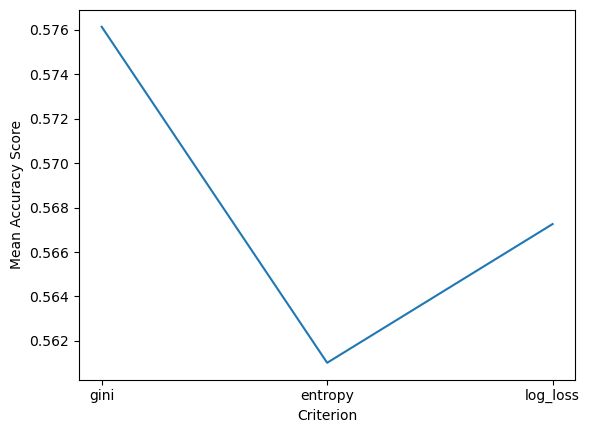

In [114]:
sns.lineplot(x= optimal_params.cv_results_["param_criterion"].data, y= optimal_params.cv_results_["mean_test_score"])
plt.xlabel("Criterion")
plt.ylabel("Mean Accuracy Score")

In [30]:
# retain model
rf_clf = RandomForestClassifier(random_state=1, n_jobs= 3, criterion= "gini")
rf_clf.fit(X= train_encoded[feature_cols], y= train_encoded["Y"])

RandomForestClassifier(n_jobs=3, random_state=1)

In [31]:
rf_pred = rf_clf.predict(kaggle_encoded[feature_cols])

df_pred = pd.concat([kaggle_df['ID'], pd.DataFrame(rf_pred,columns=['pred'])], axis = 1)
df_pred.to_csv('pred_values.csv',index=False)

Tuning number of trees

In [44]:
# ROUND 1
param_grid = [
    {"n_estimators": [100, 150, 200, 250, 300, 250, 400, 450, 500],
     "criterion":["gini"]
    }
]

optimal_params2 = GridSearchCV(
    RandomForestClassifier(n_jobs= 10),
    param_grid,
    cv= 10,
    scoring= "accuracy",
    verbose=0
)

optimal_params2.fit(train_encoded[feature_cols], train_encoded["Y"])

GridSearchCV(cv=10, estimator=RandomForestClassifier(n_jobs=10),
             param_grid=[{'criterion': ['gini'],
                          'n_estimators': [100, 150, 200, 250, 300, 250, 400,
                                           450, 500]}],
             scoring='accuracy')

In [84]:
optimal_params2.best_params_ # result 0.61671 

{'criterion': 'gini', 'n_estimators': 300}

In [41]:
optimal_params2.cv_results_

{'mean_fit_time': array([0.48247366, 0.70449417, 0.96836288, 1.17450185, 1.41902106,
        1.18338802, 1.91984777, 2.12816482, 2.39790821]),
 'std_fit_time': array([0.02283012, 0.03773658, 0.0686483 , 0.06422485, 0.07738542,
        0.04616669, 0.06884901, 0.08527195, 0.0697634 ]),
 'mean_score_time': array([0.04884257, 0.05779288, 0.07699752, 0.08071272, 0.09416208,
        0.08043752, 0.12038813, 0.12118363, 0.14738381]),
 'std_score_time': array([0.01588735, 0.01291162, 0.01644141, 0.0121884 , 0.00999257,
        0.00939301, 0.00971208, 0.01244169, 0.01254113]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', 'gini', 'gini', 'gini', 'gini',
                    'gini', 'gini'],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[100, 150, 200, 250, 300, 250, 400, 450, 500],
              mask=[False, False, False, False, Fa

In [112]:
x = list(optimal_params2.cv_results_["param_n_estimators"].data)
y = list(optimal_params2.cv_results_["mean_test_score"])

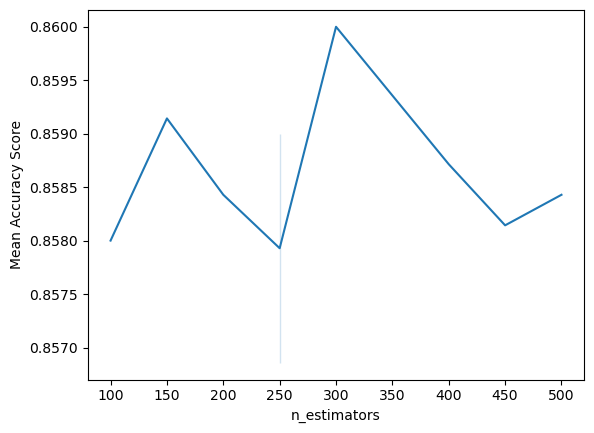

In [116]:
sns.lineplot(x= x, y= y)
plt.xlabel("n_estimators")
plt.ylabel("Mean Accuracy Score")
plt.show()

In [42]:
# retain model
rf_clf = RandomForestClassifier(random_state=1, n_jobs= 3,
                                criterion= "gini",
                                n_estimators= 250)
rf_clf.fit(X= train_encoded[feature_cols], y= train_encoded["Y"])

RandomForestClassifier(n_estimators=250, n_jobs=3, random_state=1)

In [43]:
rf_pred = rf_clf.predict(kaggle_encoded[feature_cols])

df_pred = pd.concat([kaggle_df['ID'], pd.DataFrame(rf_pred,columns=['pred'])], axis = 1)
df_pred.to_csv('pred_values.csv',index=False)

Tuning max_depth

In [50]:
# ROUND 1
param_grid = [
    {"criterion": ["gini"],
     "n_estimators": [300],
     "max_depth": [None, 10, 20, 30]
    }
]

optimal_params3 = GridSearchCV(
    RandomForestClassifier(n_jobs= 10),
    param_grid,
    cv= 10,
    scoring= "f1",
    verbose=0
)

optimal_params3.fit(train_encoded[feature_cols], train_encoded["Y"])

GridSearchCV(cv=10, estimator=RandomForestClassifier(n_jobs=10),
             param_grid=[{'criterion': ['gini'],
                          'max_depth': [None, 10, 20, 30],
                          'n_estimators': [300]}],
             scoring='f1')

In [99]:
optimal_params3.best_params_

{'criterion': 'gini', 'max_depth': 20, 'n_estimators': 300}

In [48]:
# retain model
rf_clf = RandomForestClassifier(random_state=1, n_jobs= 3,
                                criterion= "gini",
                                n_estimators= 300,
                               max_depth= 10)
rf_clf.fit(X= train_encoded[feature_cols], y= train_encoded["Y"])

RandomForestClassifier(max_depth=10, n_estimators=300, n_jobs=3, random_state=1)

In [49]:
rf_pred = rf_clf.predict(kaggle_encoded[feature_cols])

df_pred = pd.concat([kaggle_df['ID'], pd.DataFrame(rf_pred,columns=['pred'])], axis = 1)
df_pred.to_csv('pred_values.csv',index=False)

Tuning max_faetures

In [54]:
np.sqrt(15)

3.872983346207417

In [55]:
np.log2(15)

3.9068905956085187

In [58]:
# ROUND 1
param_grid = [
    {"criterion": ["gini"], # regularisation
     "n_estimators": [300],
     "max_features": [None, 2, 3, 5, 10, "sqrt", "log2"]
    }
]

optimal_params4 = GridSearchCV(
    RandomForestClassifier(n_jobs= 10),
    param_grid,
    cv= 10,
    scoring= "accuracy",
    verbose=0
)

optimal_params4.fit(train_encoded[feature_cols], train_encoded["Y"])

GridSearchCV(cv=10, estimator=RandomForestClassifier(n_jobs=10),
             param_grid=[{'criterion': ['gini'],
                          'max_features': [None, 2, 3, 5, 10, 'sqrt', 'log2'],
                          'n_estimators': [300]}],
             scoring='accuracy')

In [59]:
optimal_params4.best_params_

{'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 300}

In [101]:
optimal_params4.cv_results_

{'mean_fit_time': array([4.10769379, 1.42259057, 1.55876141, 1.85784767, 2.84226463,
        1.57176867, 1.59985285]),
 'std_fit_time': array([0.18167799, 0.1118642 , 0.06109482, 0.1606979 , 0.09284115,
        0.06715144, 0.08388487]),
 'mean_score_time': array([0.09414842, 0.09310243, 0.08953054, 0.09085457, 0.09221184,
        0.09520967, 0.09864891]),
 'std_score_time': array([0.00684936, 0.01412917, 0.01165477, 0.00684102, 0.00637033,
        0.01258524, 0.01273186]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', 'gini', 'gini', 'gini', 'gini'],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=[None, 2, 3, 5, 10, 'sqrt', 'log2'],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[300, 300, 300, 300, 300, 300, 300],
              mask=[False,

In [118]:
x = [str(i) for i in list(optimal_params4.cv_results_["param_max_features"].data)]
y = list(optimal_params4.cv_results_["mean_test_score"])

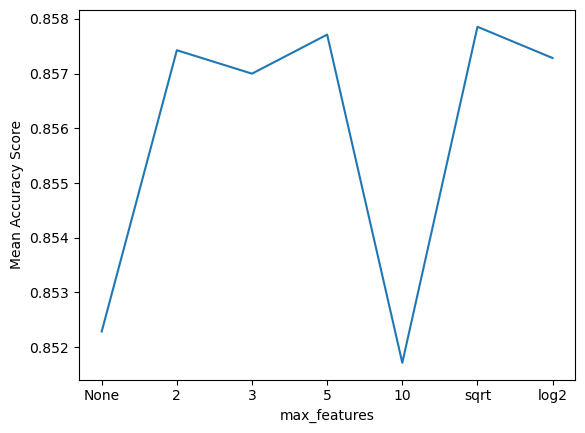

In [119]:
sns.lineplot(x= x, y= y)
plt.xlabel("max_features")
plt.ylabel("Mean Accuracy Score")
plt.show()

In [257]:
# retain model
rf_clf = RandomForestClassifier(random_state=1, n_jobs= 3,
                                criterion= "gini",
                                n_estimators= 300,
                                max_features= "sqrt")
rf_clf.fit(X= train_encoded[feature_cols], y= train_encoded["Y"])

RandomForestClassifier(n_estimators=300, n_jobs=3, random_state=1)

In [259]:
rf_pred = rf_clf.predict_proba(kaggle_encoded[feature_cols])

In [61]:
df_pred = pd.concat([kaggle_df['ID'], pd.DataFrame(rf_pred,columns=['pred'])], axis = 1)
df_pred.to_csv('pred_values.csv',index=False)

## SVM

In [120]:
from sklearn.utils import resample
from sklearn.preprocessing import scale
from sklearn.svm import SVC

In [295]:
train_encoded = pd.get_dummies(train_df, columns= cat_cols)
train_encoded = train_encoded.drop("ID", axis= 1)
train_encoded = train_encoded.drop("customer_profile", axis= 1)

In [296]:
kaggle_encoded = pd.get_dummies(kaggle_df, columns= cat_cols)
kaggle_encoded = kaggle_encoded.drop("ID", axis= 1)
kaggle_encoded = kaggle_encoded.drop("customer_profile", axis= 1)

In [297]:
test_encoded = pd.get_dummies(test_df, columns= cat_cols)
test_encoded = test_encoded.drop("ID", axis= 1)
test_encoded = test_encoded.drop("customer_profile", axis= 1)

In [298]:
feature_cols = [col for col in train_encoded.columns if col != "Y"]

In [299]:
X = train_encoded.drop("Y", axis= 1).copy()
y= train_encoded["Y"].copy()

Centering data

In [300]:
X_train_scaled = scale(X)
y_train = y

In [301]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# X_train_scaled = scale(X_train)
# X_test_scaled = scale(X_test)
X_kaggle_scaled = scale(kaggle_encoded[feature_cols])

In [306]:
clf_svm = SVC(random_state=1)
clf_svm.fit(X_train_scaled, y_train)

SVC(random_state=1)

In [307]:
feature_cols

['credit_score',
 'tenure',
 'balance',
 'number_of_products',
 'has_credit_card',
 'is_active_member',
 'salary',
 'age',
 'gender_female',
 'gender_male',
 'countary_france',
 'countary_germany',
 'countary_spain']

In [308]:
svm_pred = clf_svm.predict(X_kaggle_scaled)

In [309]:
df_pred = pd.concat([kaggle_df['ID'], pd.DataFrame(svm_pred,columns=['pred'])], axis = 1)
df_pred.to_csv('pred_values.csv',index=False)

SVM based model result 0.53674

## Add Both Interaction

In [144]:
train_df["age"] = train_df["customer_profile"].apply(extract_age)
train_df["gender"] = train_df["customer_profile"].apply(extract_gender)
train_df["countary"] = train_df["customer_profile"].apply(extract_countary)

kaggle_df["age"] = kaggle_df["customer_profile"].apply(extract_age)
kaggle_df["gender"] = kaggle_df["customer_profile"].apply(extract_gender)
kaggle_df["countary"] = kaggle_df["customer_profile"].apply(extract_countary)

test_df["age"] = test_df["customer_profile"].apply(extract_age)
test_df["gender"] = test_df["customer_profile"].apply(extract_gender)
test_df["countary"] = test_df["customer_profile"].apply(extract_countary)

In [145]:
cat_cols = ["gender", "countary"]

In [146]:
train_encoded = pd.get_dummies(train_df, columns= cat_cols)
train_encoded = train_encoded.drop("ID", axis= 1)
train_encoded = train_encoded.drop("customer_profile", axis= 1)

kaggle_encoded = pd.get_dummies(kaggle_df, columns= cat_cols)
kaggle_encoded = kaggle_encoded.drop("ID", axis= 1)
kaggle_encoded = kaggle_encoded.drop("customer_profile", axis= 1)

test_encoded = pd.get_dummies(test_df, columns= cat_cols)
test_encoded = test_encoded.drop("ID", axis= 1)
test_encoded = test_encoded.drop("customer_profile", axis= 1)

In [147]:
train_encoded["credit_score/age"] = train_encoded["credit_score"] / train_encoded["age"]
train_encoded["age/number_of_product"] = train_encoded["age"] / train_encoded["number_of_products"]


kaggle_encoded["credit_score/age"] = kaggle_encoded["credit_score"] / kaggle_encoded["age"]
kaggle_encoded["age/number_of_product"] = kaggle_encoded["age"] / kaggle_encoded["number_of_products"]


test_encoded["credit_score/age"] = test_encoded["credit_score"] / test_encoded["age"]
test_encoded["age/number_of_product"] = test_encoded["age"] / test_encoded["number_of_products"]

In [148]:
feature_cols = [col for col in train_encoded.columns if col != "Y"]

In [149]:
X = train_encoded.drop("Y", axis= 1).copy()
y= train_encoded["Y"].copy()

Centering data

In [150]:
X_train_scaled = scale(X)
y_train = y

In [151]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# X_train_scaled = scale(X_train)
# X_test_scaled = scale(X_test)
X_kaggle_scaled = scale(kaggle_encoded[feature_cols])

In [152]:
clf_svm = SVC(random_state=1)
clf_svm.fit(X_train_scaled, y_train)

SVC(random_state=1)

In [153]:
svm_pred = clf_svm.predict(X_kaggle_scaled)

In [154]:
df_pred = pd.concat([kaggle_df['ID'], pd.DataFrame(svm_pred,columns=['pred'])], axis = 1)
df_pred.to_csv('pred_values.csv',index=False)

Result of\
* based 0.53674
* 2 interaciton 0.55172

## Fine-Tune parameters

In [155]:
train_df["age"] = train_df["customer_profile"].apply(extract_age)
train_df["gender"] = train_df["customer_profile"].apply(extract_gender)
train_df["countary"] = train_df["customer_profile"].apply(extract_countary)

kaggle_df["age"] = kaggle_df["customer_profile"].apply(extract_age)
kaggle_df["gender"] = kaggle_df["customer_profile"].apply(extract_gender)
kaggle_df["countary"] = kaggle_df["customer_profile"].apply(extract_countary)

test_df["age"] = test_df["customer_profile"].apply(extract_age)
test_df["gender"] = test_df["customer_profile"].apply(extract_gender)
test_df["countary"] = test_df["customer_profile"].apply(extract_countary)

In [156]:
cat_cols = ["gender", "countary"]

In [157]:
train_encoded = pd.get_dummies(train_df, columns= cat_cols)
train_encoded = train_encoded.drop("ID", axis= 1)
train_encoded = train_encoded.drop("customer_profile", axis= 1)

kaggle_encoded = pd.get_dummies(kaggle_df, columns= cat_cols)
kaggle_encoded = kaggle_encoded.drop("ID", axis= 1)
kaggle_encoded = kaggle_encoded.drop("customer_profile", axis= 1)

test_encoded = pd.get_dummies(test_df, columns= cat_cols)
test_encoded = test_encoded.drop("ID", axis= 1)
test_encoded = test_encoded.drop("customer_profile", axis= 1)

In [158]:
train_encoded["credit_score/age"] = train_encoded["credit_score"] / train_encoded["age"]
train_encoded["age/number_of_product"] = train_encoded["age"] / train_encoded["number_of_products"]


kaggle_encoded["credit_score/age"] = kaggle_encoded["credit_score"] / kaggle_encoded["age"]
kaggle_encoded["age/number_of_product"] = kaggle_encoded["age"] / kaggle_encoded["number_of_products"]


test_encoded["credit_score/age"] = test_encoded["credit_score"] / test_encoded["age"]
test_encoded["age/number_of_product"] = test_encoded["age"] / test_encoded["number_of_products"]

In [159]:
feature_cols = [col for col in train_encoded.columns if col != "Y"]

In [160]:
X = train_encoded.drop("Y", axis= 1).copy()
y= train_encoded["Y"].copy()

Centering data

In [161]:
X_train_scaled = scale(X)
y_train = y

In [162]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# X_train_scaled = scale(X_train)
# X_test_scaled = scale(X_test)
X_kaggle_scaled = scale(kaggle_encoded[feature_cols])

**Tune kernel type**

In [163]:
param_grid = [
    {"kernel": ["linear", "poly", "rbf", "sigmoid"]}
]

optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv= 10,
    scoring= "accuracy",
    verbose=0
)

optimal_params.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}],
             scoring='accuracy')

In [186]:
x = [dict_["kernel"] for dict_ in optimal_params.cv_results_["params"]]
y = list(optimal_params.cv_results_["mean_test_score"])

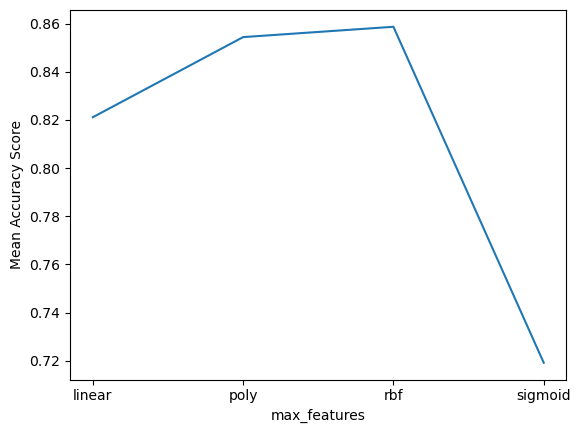

In [187]:
sns.lineplot(x= x, y= y)
plt.xlabel("max_features")
plt.ylabel("Mean Accuracy Score")
plt.show()

result: 0.55172

**Tune C**

Tune kernel type

In [198]:
param_grid = [
    {"C": [0.5, 1, 10, 100]}
]

optimal_params2 = GridSearchCV(
    SVC(),
    param_grid,
    cv= 10,
    scoring= "accuracy",
    verbose=0
)

optimal_params2.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=SVC(), param_grid=[{'C': [0.5, 1, 10, 100]}],
             scoring='accuracy')

In [201]:
x = [dict_["C"] for dict_ in optimal_params2.cv_results_["params"]]
y = list(optimal_params2.cv_results_["mean_test_score"])

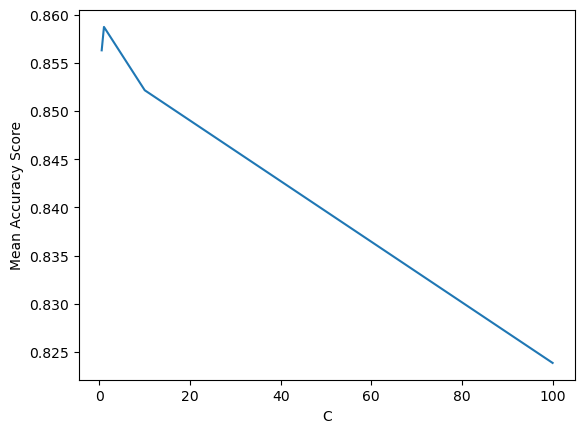

In [202]:
sns.lineplot(x= x, y= y)
plt.xlabel("C")
plt.ylabel("Mean Accuracy Score")
plt.show()

**Tuning gamma**

In [203]:
param_grid = [
    {"C": [1], # regularisation
    "gamma": ["scale", 1, 0.1, 0.01, 0.001, 0.0001],
     "kernel": ["rbf"]
    }
]

optimal_params3 = GridSearchCV(
    SVC(),
    param_grid,
    cv= 10,
    scoring= "accuracy",
    verbose=0
)

optimal_params3.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1],
                          'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf']}],
             scoring='accuracy')

In [311]:
x = [str(dict_["gamma"]) for dict_ in optimal_params3.cv_results_["params"]]
y = list(optimal_params3.cv_results_["mean_test_score"])

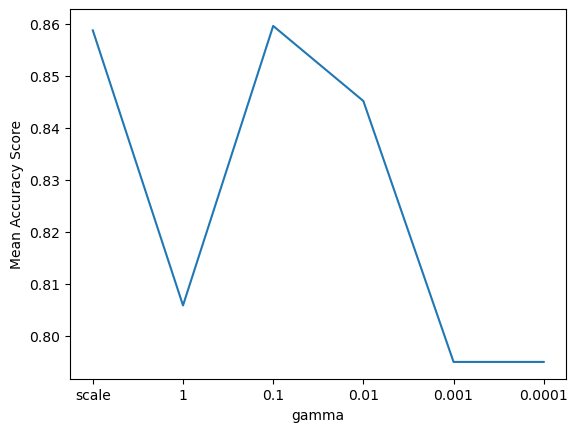

In [312]:
sns.lineplot(x= x, y= y)
plt.xlabel("gamma")
plt.ylabel("Mean Accuracy Score")
plt.show()

In [210]:
clf_svm = SVC(random_state=1, C=1, gamma= 0.1, kernel= "rbf")
clf_svm.fit(X_train_scaled, y_train)

SVC(C=1, gamma=0.1, random_state=1)

In [211]:
svm_pred = clf_svm.predict(X_kaggle_scaled)

In [212]:
df_pred = pd.concat([kaggle_df['ID'], pd.DataFrame(svm_pred,columns=['pred'])], axis = 1)
df_pred.to_csv('pred_values.csv',index=False)

C:\Users\non_n\conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='number_of_products', ylabel='count'>

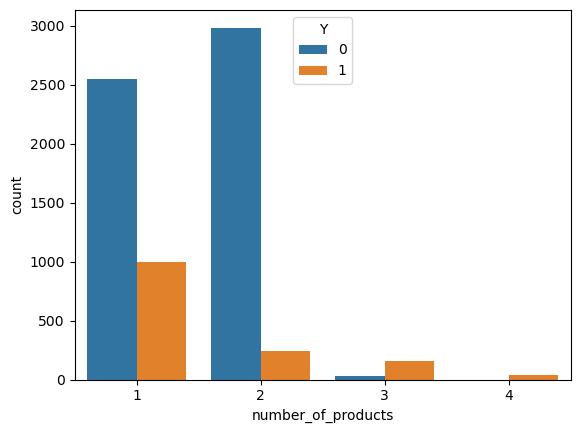

In [217]:
sns.countplot(train_encoded["number_of_products"], hue= train_encoded["Y"])

## XGboost

In [228]:
train_df = pd.read_csv("A2_customer_churn_labeled.csv")
train_df["age"] = train_df["customer_profile"].apply(extract_age)
train_df["gender"] = train_df["customer_profile"].apply(extract_gender)
train_df["country"] = train_df["customer_profile"].apply(extract_countary)

kaggle_df = pd.read_csv("A2_customer_churn_kaggle.csv")
kaggle_df["age"] = kaggle_df["customer_profile"].apply(extract_age)
kaggle_df["gender"] = kaggle_df["customer_profile"].apply(extract_gender)
kaggle_df["country"] = kaggle_df["customer_profile"].apply(extract_countary)

test_df = pd.read_csv("A2_customer_churn_submission.csv")
test_df["age"] = test_df["customer_profile"].apply(extract_age)
test_df["gender"] = test_df["customer_profile"].apply(extract_gender)
test_df["country"] = test_df["customer_profile"].apply(extract_countary)

X_train = train_df[[col for col in kaggle_df.columns if col not in ["Y","customer_profile","ID"]]]
y_train = train_df["Y"]

train_df_drop = train_df.drop(columns=["customer_profile","ID"])
test_df_drop = test_df.drop(columns=["customer_profile","ID"])
kaggle_df_drop = kaggle_df.drop(columns=["customer_profile"])

In [229]:
import pandas as pd


numerical_columns = ['credit_score','tenure','balance','number_of_products','salary','age']

categorical_columns = ['has_credit_card','is_active_member','gender','country']

# Use pandas' get_dummies to one-hot encode the specified columns
train_df_encode = pd.get_dummies(train_df_drop, columns=categorical_columns, drop_first=False)
test_df_encode = pd.get_dummies(test_df_drop, columns=categorical_columns, drop_first=False)
kaggle_df_encode = pd.get_dummies(kaggle_df_drop, columns=categorical_columns, drop_first=False)
X_train = train_df_encode.drop(columns="Y")
y_train = train_df_encode['Y']

In [230]:
import xgboost as xgb
from xgboost import XGBClassifier

In [231]:
first_withtuning_xg_boost =  XGBClassifier(random_state=42,learning_rate =0.12,max_depth=5,n_estimators=100,reg_alpha=1)

# Fit the model to the training data
first_withtuning_xg_boost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.12, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [232]:
# Predict on the test set
xgb_pred = first_withtuning_xg_boost.predict_proba(kaggle_df_encode[[col for col in kaggle_df_encode.columns if col not in ["ID","Y"]]])

## Averaging

In [275]:
aver_pred = (0.6*rf_pred + 0.4*xgb_pred) / 2

In [276]:
aver_pred = np.argmax(aver_pred, axis= 1)

In [277]:
df_pred = pd.concat([kaggle_df['ID'], pd.DataFrame(aver_pred,columns=['pred'])], axis = 1)
df_pred.to_csv('pred_values.csv',index=False)